<a href="https://colab.research.google.com/github/valsson-group/UNT-Chem5660-Fall2023/blob/main/Python-PlotData/PlotDihedralData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Making Data Plots Using Python - Example for Dihedral Scan Curve

In this notebook we show how we can use Numpy and Matplotlib to make plot of data series.

The following resources can be useful:
  - [Matplotlib Documentation](https://matplotlib.org/stable/index.html)
  - [Matplotlib Cheat Sheets](https://matplotlib.org/cheatsheets/)
  - [Matplotlib Tutorials](https://matplotlib.org/stable/tutorials/index.html)
  - [NumPy User Guide](https://numpy.org/doc/stable/user/index.html)

We first import the numpy and matplotlib packages

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150

## Loading the Datasets

The first step is to load the datasets we want to plot.

Since we are here runnig this notebook on Google Colab, we need to upload the datafiles onto the runtime instance we are using. You can do this by selecting the folder icon here on the left and dragging the files there.

**Note these files are only temporarily saved there and will be deleted once this runtime is terminated. Thus, do not use this save or keep files**.

Once we have uploaded the data files, we will load the data into a numpy array using the `np.loadtxt("<name-of-datafile>")` function, where `<name-of-datafile>` is the name of a given data file that we want to load. The filename should be  enclosed in parenthesis.

### Example
Here we will use the `Benzamidine_Scan_B3LYP_cc-pVDZ_tot_ener.txt` data file that we downlaod from the course Github repo as an example. We will load this data file as
```
data_hf_ccpvdz = np.loadtxt("Benzamidine_Scan_B3LYP_cc-pVDZ_tot_ener.txt")
```
will load the data from the file `Benzamidine_Scan_B3LYP_cc-pVDZ_tot_ener.txt` into a numpy array with the variable name `data_b3lyp_ccpvdz`.

We can access the first column of the data by using `data_b3lyp_ccpvdz[:,0]` and the second column by using `data_b3lyp_ccpvdz[:,1]` (note that python indexing starts from 0).

### Your Own Data

For your own data sets, you need to do a seperate `np.loadtxt` call for each data file, and use a seperate variable name for each data set.

In [ ]:
# This is only needed to download example data
%%capture
!wget https://raw.githubusercontent.com/valsson-group/UNT-Chem5660-Fall2023/main/Python-PlotData/Benzamidine_Scan_B3LYP_cc-pVDZ_tot_ener.txt
!wget https://raw.githubusercontent.com/valsson-group/UNT-Chem5660-Fall2023/main/Python-PlotData/Benzamidine_Scan_B3LYP_aug-cc-pVDZ_tot_ener.txt


In [ ]:
# This is just an example
data_b3lyp_ccpvdz = np.loadtxt("Benzamidine_Scan_B3LYP_cc-pVDZ_tot_ener.txt")
data_b3lyp_augccpvdz = np.loadtxt("Benzamidine_Scan_B3LYP_aug-cc-pVDZ_tot_ener.txt")

# For your own data, you need to write a seperate np.loadtxt call for each data file,
# something like
# data_blyp = np.loadtxt("<name-of-datafile>")
# where you replace <name-of-datafile> with the filename.


# This is just to show how you can print the datasets.
# This is not really needed, so you just comment it out
# by adding # in front of the line.
print("Column 1:")
print(data_b3lyp_ccpvdz[:,0])
print("")
print("Column 2:")
print(data_b3lyp_ccpvdz[:,1])




Column 1:
[  0.  10.  20.  30.  40.  50.  60.  70.  80.  90. 100. 110. 120. 130.
 140. 150. 160. 170. 180. 190. 200. 210. 220. 230. 240. 250. 260. 270.
 280. 290. 300. 310. 320. 330. 340. 350. 360.]

Column 2:
[ 1.63101109e+00  8.77104633e-02 -3.04600000e-07  2.87151180e-01
  9.34471155e-01  1.86463037e+00  2.93369258e+00  3.94006156e+00
  4.65521783e+00  4.89713403e+00  4.63219137e+00  3.99562753e+00
  3.19119675e+00  2.41067031e+00  1.80412779e+00  1.46632185e+00
  1.38524700e+00  1.05917549e+00  4.66343420e-01  6.77688389e-02
  1.05619354e-02  3.33431261e-01  1.00294374e+00  1.93081066e+00
  2.97471225e+00  3.95061251e+00  4.65153435e+00  4.89731099e+00
  4.62252521e+00  3.94532386e+00  3.09640077e+00  2.30295956e+00
  1.72598403e+00  1.43858656e+00  1.37990438e+00  1.05776548e+00
  4.93594276e-01]


## Plotting Data

We then plot the data by using the `plt.plot(...)` function in matplotlib.

### The plt.plot function
You need to have a seperate `plt.plot(...)` call for each data set. For example,
```
plt.plot(data_b3lyp_ccpvdz[:,0],
         data_b3lyp_ccpvdz[:,1]-np.min(data_b3lyp_ccpvdz[:,1]),
         "--x",
         markersize=5,
         label="B3LYP/cc-pVDZ")
```
where we plot the first column of the data set on the x-axis (`x=data_b3lyp_ccpvdz[:,0]`) and the second column of the data on the y-axis (` y=data_b3lpy_ccpvdz[:,1]`.

### Aligning the minimum of the y-axis to zero
Note that here we are comparing energies obtained with different levels of theory so to make sure that the minimum of each curve is aligned with zero use the `np.min` function to find the minimum of the data set and substract that from that data vector for the y-axis. It will depend on the data if you want to do this or not.

### Labelling curves
You can label each curve with a seperate label by using the `label="<label-text>"` keyword. The legend that shows this labels is activated by the `plt.legend()` call.

### Axis labels
You can add a label to the x- and y-axis by using the `plt.xlabel("...")` and `plt.ylabel("...") functions.

### Range of y-axis
You change the range of the y-axis by using the `plt.ylim` function. For example, we set it to the range from 0 to 6 by using `plt.ylim([0,6])`. You will need to adjust this to your data.

### Location of x-axis tics
We can set the location of the tics on the x-axis by using the `plt.xticks(np.arange(0,390,30))` command. You might need to adjust to your data if you have a differnt range of the x-axis, for exmaple by using `plt.xticks(np.arange(-180,190,30))`.

### Saving figure
The figure will be shown in the notebook. We can also save the figure to a file by using the `plt.savefig("plot.png")` function. The extension used in filename determines the format (e.g., `.jpg` or `.png`). You can then download the file from the file manager here on the left side.

Note that this file is only temporarily saved there and will be deleted once this runtime is terminated. Thus, you should always download the figure to your computer right away.



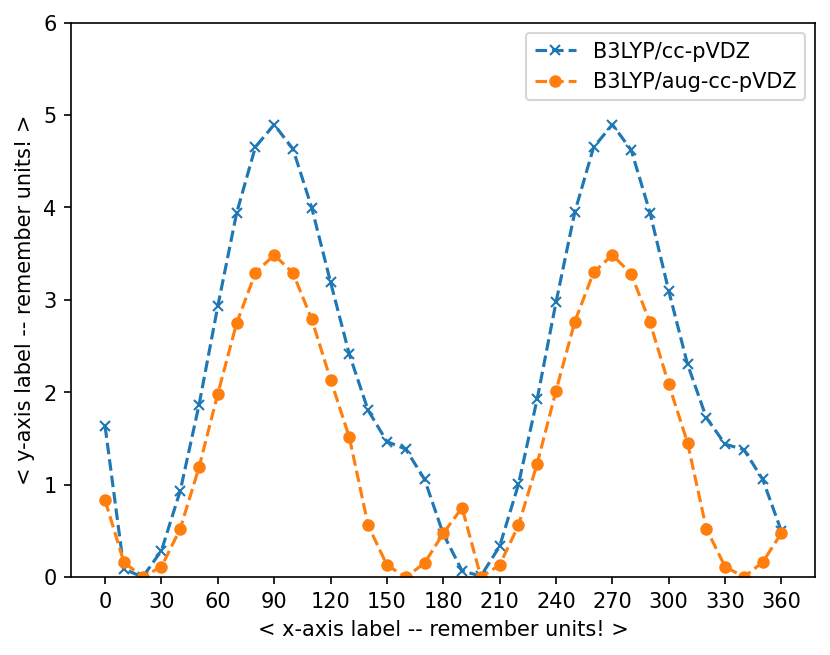

In [ ]:
# Plot different data sets.
# You need to add a seperate plt.plot call for each data set

plt.plot(data_b3lyp_ccpvdz[:,0],
         data_b3lyp_ccpvdz[:,1]-np.min(data_b3lyp_ccpvdz[:,1]),
         "--x",
         markersize=5,
         label="B3LYP/cc-pVDZ")

plt.plot(data_b3lyp_augccpvdz[:,0],
         data_b3lyp_augccpvdz[:,1]-np.min(data_b3lyp_augccpvdz[:,1]),
         "--o",
         markersize=5,
         label="B3LYP/aug-cc-pVDZ")


# Show legend with labels
plt.legend()

# Set x- and y-axis labels
plt.xlabel("< x-axis label -- remember units! >")
plt.ylabel("< y-axis label -- remember units! >")

# Set range of the y-axis, in this case from 0 to 6
plt.ylim([0,6])

# Set x-tics to be at 0, 30, 60, ..., 360
plt.xticks(np.arange(0,390,30))

# Save the figure to a file
plt.savefig("plot.png")

